# Welcome to Week 4

## Dimansionality Reduction

## Curse of Dimensionality
- Sparsity 
- Distance concentration
- Presence of hubs

**Classification confusion**

In machine learning we face unique problems when analysing and organising data in high-dimensional spaces. When the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This is really problematic since there isn’t enough data locally.

<hr>

<img src="figure/Curse of Dimensionality image 2.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
 <br>
 

 Plot Datapoints in 3D: https://technology.cpm.org/general/3dgraph/

### Example

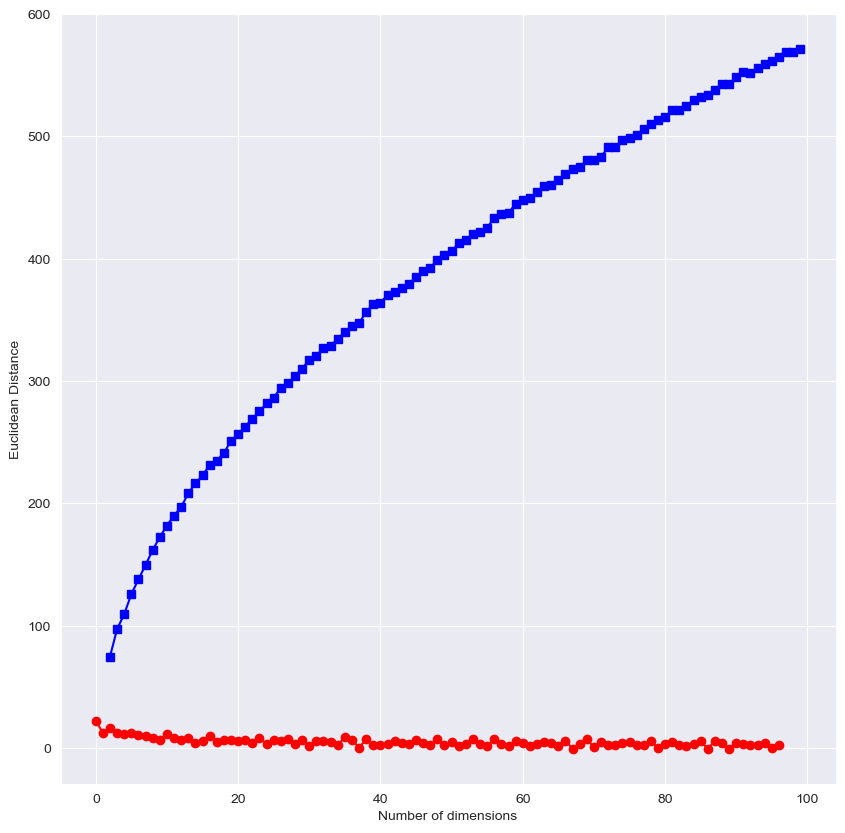

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def euclidean_distance(p1, p2):
    p1, p2 = np.array(p1), np.array(p2) #Ensure p1/p2 are NumPy Arrays
    return np.sqrt(np.sum(np.square(p2-p1)))
%matplotlib inline
sns.set_style('darkgrid')
avg_distances = []
for n in range(2, 100):
    avg_distances.append(np.mean([euclidean_distance(np.random.randint(low=-100, high=100, size=n), [0 for i in range(n)]) for p in range(500)]))
plt.figure(figsize=(10,10))
plt.plot(range(2,100), avg_distances,'bs-')
plt.plot( np.diff(avg_distances),'ro-')
plt.xlabel('Number of dimensions')
plt.ylabel('Euclidean Distance')
plt.show()

<hr>

So it reduces the utility of the measure to discriminate between near and far neighbours. Relative contrast between near and far neighbours diminishes as the dimensionality increases. This is known as the concentration effect of the distance measure.
<hr>

## Dimention Reduction

**Dimensionality reduction**, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space. <br>
There are different methods for dimension reduction as follows:<br>
- Component based
    1. PCA
    2. ICA
- Projection based
    1. tSNE
    2. ISOMAP
    3. Umap


<hr>

## PCA via Eigen Value Decomposition
Now we’ll see how to perform PCA with eigenvalue decomposition. It is fairly easy:<br>
1. Compute data covariance matrix $C$  
2. Perform Eigen value decomposition (EVD) as $C=UDU^T$
3. Reduced dimension data is given by:
<hr>

<img src="figure/Formulation of PCA and deriving principal components image 2.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
<br>
 

<hr>

In [2]:
import pandas as pd
data = pd.read_csv('data/train_wbcd.csv').dropna()
print(data.shape)
data

(98, 32)


,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,909410,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,...,13.90,19.69,92.12,595.6,0.09926,0.23170,0.33440,0.10170,0.1999,0.07127
3,90317302,B,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,...,11.38,15.65,73.23,394.5,0.13430,0.16500,0.08615,0.06696,0.2937,0.07722
4,914102,B,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.11180,0.16460,0.07698,0.04195,0.2687,0.07429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8611555,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,...,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
96,873593,M,21.09,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
97,891703,B,11.85,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.02280,...,13.06,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
98,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


array([[<AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>],
       [<AxesSubplot:title={'center':'f3'}>, <AxesSubplot:>]],
      dtype=object)

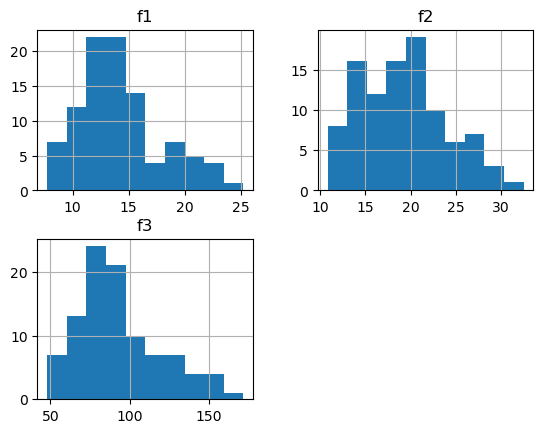

In [3]:
data.iloc[:,2:5].hist()

#### Step 1: Normalising the data

,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,909410,B,-0.061176,-0.745790,-0.125847,-0.169660,-1.189642,-0.866279,-0.818522,-0.538020,...,-0.300328,-0.896885,-0.341654,-0.370920,-1.321280,-1.007618,-1.020375,-0.467069,-1.286877,-1.161270
1,84358402,M,1.604906,-1.023672,1.613566,1.697063,0.370235,0.465961,1.269867,1.300726,...,1.152965,-1.288280,1.171781,1.097470,0.238537,-0.364911,0.583000,0.595090,-0.894283,-0.485487
2,8912284,B,-0.361443,-0.737369,-0.336441,-0.412699,-1.301493,-0.174289,0.250019,-0.363555,...,-0.492703,-0.840548,-0.461543,-0.525531,-1.511210,-0.198791,0.271259,-0.208735,-1.522777,-0.870153
3,90317302,B,-1.060293,-1.469969,-1.037022,-0.939869,0.344539,-0.526946,-0.837858,-0.699720,...,-0.972690,-1.439501,-0.975084,-0.858781,0.096318,-0.613782,-0.908462,-0.668025,0.092368,-0.454770
4,914102,B,-0.289697,0.281535,-0.337206,-0.352953,-1.666522,-0.919229,-0.852360,-0.868040,...,-0.378421,0.459653,-0.375364,-0.438200,-0.935913,-0.616270,-0.952039,-0.998678,-0.338108,-0.659320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8611555,M,2.914919,1.201495,3.004790,3.267759,0.823687,2.779515,2.872148,3.196681,...,2.573878,1.224651,2.789338,2.733065,1.151488,2.139966,1.759633,2.237113,-0.909780,1.491596
96,873593,M,1.817484,1.550954,1.904041,1.734911,1.413175,3.068493,1.867627,2.371633,...,1.941514,1.203895,1.832397,1.949238,0.775297,3.078206,1.904098,2.284708,2.091497,3.118221
97,891703,B,-0.637794,-0.366859,-0.662844,-0.639517,-0.882806,-0.855723,-0.747663,-0.625963,...,-0.652699,0.057880,-0.672777,-0.654456,0.215598,-0.546587,-0.692476,-0.344909,0.374760,-0.953927
98,925311,B,-0.810514,2.140402,-0.848977,-0.765768,-1.580366,-1.216340,-1.064582,-1.164962,...,-0.869836,1.918487,-0.921799,-0.784044,-1.813540,-1.298548,-1.317859,-1.553290,-2.268362,-1.723258


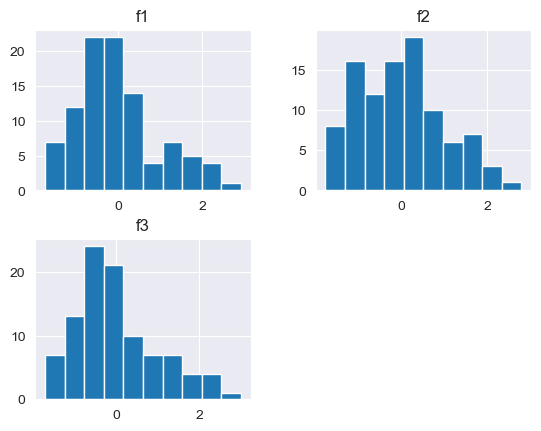

In [10]:
data_norm=data.copy()
mu = data_norm.iloc[:,2:].mean(axis=0) # mean of each col
sigma = data_norm.iloc[:,2:].std(axis=0)  # std dev of each col
data_norm.iloc[:,2:]=(data_norm.iloc[:,2:]-mu)/sigma
# print(data_norm.head(2))
data_norm.iloc[:,2:5].hist()
data_norm

### Step 2: Calculate the covariance matrix of normalised data

If  $m$ is the number of training data, calculate the covariance matrix as: $\sum=\frac{1}{m}X_{norm}^TX_{norm}$ 
 

In [18]:
# Covariance matrix of normalized data
Xnorm=data_norm.iloc[:,2:].copy().values
m = len(Xnorm)
covmat = np.dot(Xnorm.T, Xnorm)/m 
print(m,covmat.shape)
Xnorm.shape, Xnorm

98 (30, 30)


((98, 30),
 array([[-0.06117588, -0.74578953, -0.12584665, ..., -0.46706926,
         -1.28687667, -1.16126983],
        [ 1.60490575, -1.02367228,  1.61356559, ...,  0.59508976,
         -0.89428274, -0.48548723],
        [-0.36144259, -0.73736884, -0.33644128, ..., -0.20873484,
         -1.52277741, -0.87015274],
        ...,
        [-0.63779425, -0.3668585 , -0.66284384, ..., -0.34490907,
          0.37475994, -0.95392744],
        [-0.81051404,  2.14040177, -0.84897738, ..., -1.55329013,
         -2.2683615 , -1.72325847],
        [ 0.04511322, -0.56053436,  0.04843856, ...,  0.3161309 ,
          0.29210858,  0.27267384]]))

#### Step 3: Calculate the eigenvectors and eigenvalues of the covariance matrix

Now, compute the eigenvalues $(S)$ and eigenvectors $(U)$ of this covariance matrix. The eigenvectors $(U)$ 

become the principal components. We use ***linalg.eig()*** function from numpy: to compute the eigenvalues and eigenvectors of a square array.

In [14]:
S,U = np.linalg.eig(covmat)
print(f'Eigen values: {len(S)} {S}')
print(f'Eigen vectors: {len(U)}, {len(U[0])}')
print(U)

Eigen values: 30 [1.49701577e+01 4.84208017e+00 2.86986597e+00 1.74476354e+00
 1.40897663e+00 1.02042279e+00 6.52709557e-01 4.95710861e-01
 3.80491552e-01 3.45647670e-01 2.12787985e-01 1.51104822e-01
 1.35810362e-01 1.19389943e-01 8.75218572e-02 5.89839509e-02
 4.22709844e-02 3.06819086e-02 2.74351643e-02 2.51762867e-02
 2.09062049e-02 1.45985380e-02 6.01039169e-05 2.66148607e-04
 7.07477727e-04 3.65782025e-03 4.67988035e-03 7.09250226e-03
 1.10499268e-02 8.86927254e-03]
Eigen vectors: 30, 30
[[-2.16774558e-01  2.15243625e-01  1.40730180e-02  1.12062426e-01
  -1.83120711e-02  1.18361411e-02 -1.81903760e-02  1.41336803e-02
  -2.62160540e-01  1.36528100e-01 -5.56907637e-02 -5.16219955e-02
   2.43721774e-02 -1.79037313e-02 -3.09905389e-02 -7.06366107e-02
  -1.79859033e-02  3.09997483e-01  9.71126391e-02 -8.91949768e-02
   3.34218848e-02 -1.88848900e-01  6.98423243e-01 -1.44508200e-01
   2.70936066e-01 -3.16414376e-02  1.35561085e-01  1.98911292e-01
   1.94708522e-02 -3.03600414e-02]
 [-9.

<hr>

### Decorrelation
<hr>

In [15]:
# Z contains uncorrelated data  
Z = np.dot(Xnorm,U)
print(Z.shape)
Z

(98, 30)


array([[ 3.28260199,  2.23848954,  0.60894466, ...,  0.01335989,
        -0.12526797,  0.09479428],
       [-3.7821656 ,  1.0078318 , -0.43293488, ..., -0.07010847,
         0.02357352, -0.00870953],
       [ 1.39587343, -0.1365931 , -0.68791093, ..., -0.04368048,
         0.20591844, -0.08816059],
       ...,
       [ 2.89658369,  0.55734122,  0.29235238, ..., -0.02114553,
         0.03038808, -0.02532869],
       [ 5.21307161,  2.57589728, -4.59010153, ..., -0.00611617,
        -0.03052073,  0.12647341],
       [-0.32144664, -0.23003019,  1.25431423, ..., -0.04024754,
         0.05245097, -0.01072134]])

<hr>

#### Lets visualize the data before and after PCA.
<hr>

Text(0.5, 1.0, 'Data after PCA')

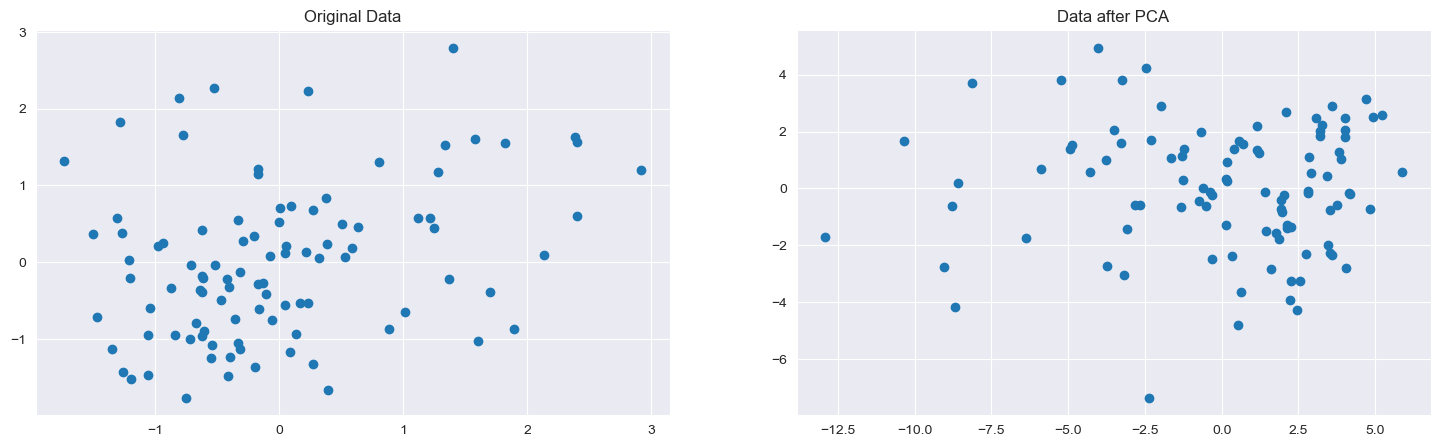

In [19]:
# 2 plots in one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs


# plot for original data 
axs[0].scatter(Xnorm[:,0], Xnorm[:,1])
axs[0].set_title("Original Data")


# plot for uncorrelated data after PCA
axs[1].scatter(Z[:,0], Z[:,1])
axs[1].set_title("Data after PCA")


<hr>

#### Number of principal components to retain
<hr>

In [43]:
k = 2 # number of principal components to retain

Ured =  U[:,0:k] # choose the first k principal components

#project our data Xnorm onto Ured
Zred = np.dot(Xnorm,Ured) 

print(Ured.shape)
print(Zred.shape)

(30, 2)
(98, 2)


In [52]:
input_array = np.array(S)
cumS = np.cumsum(input_array)
print(S[:k], cumS, S)
Zred.shape, Zred

[14.97015767  4.84208017] [14.97015767 19.81223785 22.68210381 24.42686736 25.83584399 26.85626677
 27.50897633 28.00468719 28.38517874 28.73082641 28.9436144  29.09471922
 29.23052958 29.34991952 29.43744138 29.49642533 29.53869632 29.56937822
 29.59681339 29.62198968 29.64289588 29.65749442 29.65755452 29.65782067
 29.65852815 29.66218597 29.66686585 29.67395835 29.68500828 29.69387755] [1.49701577e+01 4.84208017e+00 2.86986597e+00 1.74476354e+00
 1.40897663e+00 1.02042279e+00 6.52709557e-01 4.95710861e-01
 3.80491552e-01 3.45647670e-01 2.12787985e-01 1.51104822e-01
 1.35810362e-01 1.19389943e-01 8.75218572e-02 5.89839509e-02
 4.22709844e-02 3.06819086e-02 2.74351643e-02 2.51762867e-02
 2.09062049e-02 1.45985380e-02 6.01039169e-05 2.66148607e-04
 7.07477727e-04 3.65782025e-03 4.67988035e-03 7.09250226e-03
 1.10499268e-02 8.86927254e-03]


((98, 2),
 array([[ 3.28260199e+00,  2.23848954e+00],
        [-3.78216560e+00,  1.00783180e+00],
        [ 1.39587343e+00, -1.36593105e-01],
        [ 3.53084937e+00, -7.60679601e-01],
        [ 2.84277793e+00,  1.09935908e+00],
        [ 3.53855657e+00, -2.25604342e+00],
        [ 1.45213446e+00, -1.47868435e+00],
        [ 4.01466272e+00,  2.45750493e+00],
        [-1.99192220e+00,  2.89710125e+00],
        [ 3.42781304e+00,  4.20455830e-01],
        [-1.63542793e+00,  1.08483549e+00],
        [ 3.19719312e+00,  1.84209017e+00],
        [ 3.18913534e+00,  2.03381411e+00],
        [ 1.86679491e+00, -1.78375881e+00],
        [ 2.74955182e+00, -2.29966694e+00],
        [ 3.59153281e+00,  2.88922927e+00],
        [ 3.59025743e+00, -2.32215495e+00],
        [ 4.14694108e+00, -1.51319264e-01],
        [ 2.25922025e+00, -1.35271617e+00],
        [-4.01425075e+00,  4.94086066e+00],
        [ 1.62407945e-01,  2.57720659e-01],
        [ 2.10126288e+00,  2.69759711e+00],
        [-6.11964326e-

<BarContainer object of 30 artists>

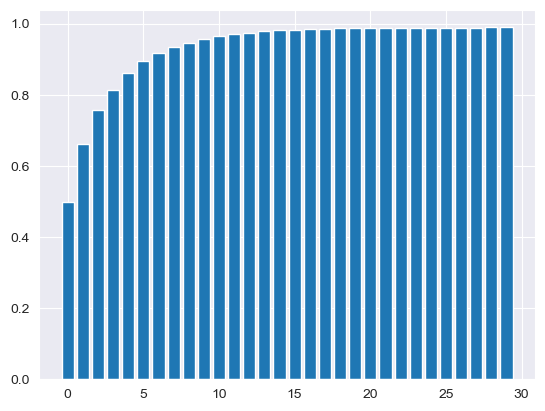

In [56]:
plt.bar(list(range(cumS.shape[0])), cumS/cumS.shape[0], width=0.8, bottom=None, align='center') 

Text(0.5, 1.0, 'Principal components')

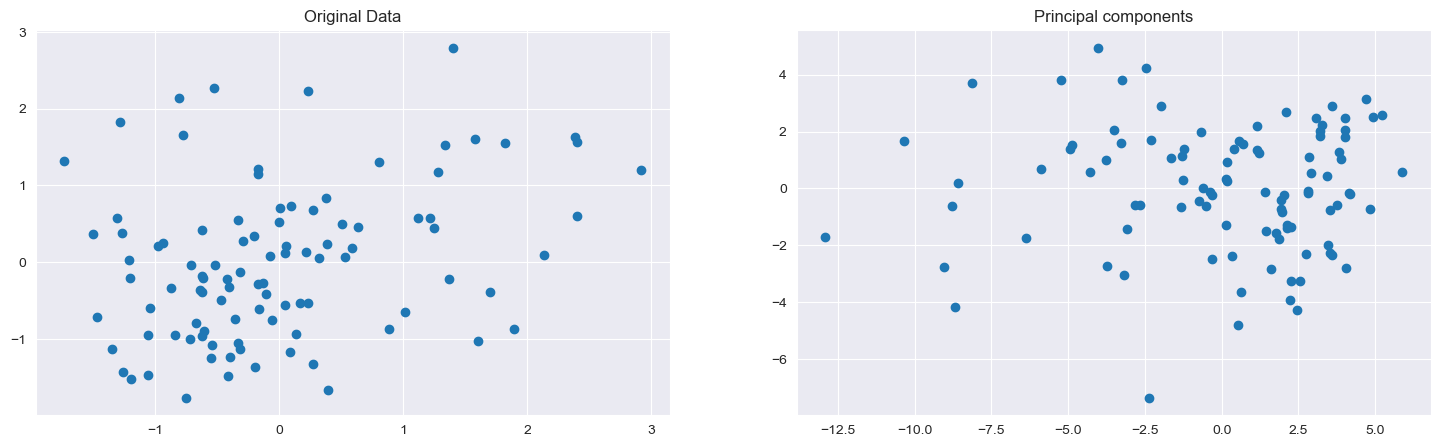

In [49]:
#Visualize the recovered data
# 2 plots in one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs


# plot for original data 
axs[0].scatter(Xnorm[:,0], Xnorm[:,1])
axs[0].set_title("Original Data")

# plot for Xnorm 
axs[1].scatter(Zred[:,0], Zred[:,1])
axs[1].set_title("Principal components")


<hr>

### Visualize the recovered data
<hr>

(98, 30)


Text(0.5, 1.0, 'Recovered data after dimensionality reduction')

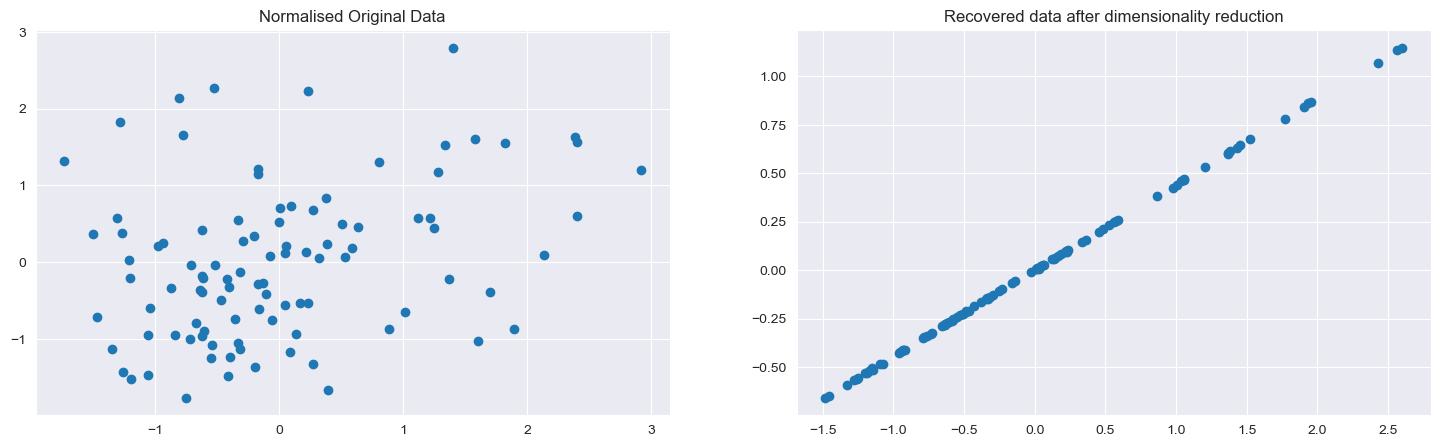

In [22]:
#recover our Xnorm data from Zred
Xrec = np.dot(Zred, Ured.T)
print(Xrec.shape)


#Visualize the recovered data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs


# plot for Xnorm 
axs[0].scatter(Xnorm[:,0], Xnorm[:,1])
axs[0].set_title("Normalised Original Data")


# plot for Xrec
axs[1].scatter(Xrec[:,0], Xrec[:,1])
axs[1].set_title("Recovered data after dimensionality reduction")


<hr> 

# Task
1. Load "diabetes" datasets from SKlearn and do the PCA for n=3
2. Visualizing the After and before PCA for the first two features.
3. Report the reconstruction error.

<hr> 

#### Reconstruction error
<hr>

In [23]:
rec_err = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print("The reconstruction error is: {}".format(rec_err))


The reconstruction error is: 0.576874113303303


### SKlearn PCA [[click for more](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)]

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xnorm)

PCA(n_components=2)

In [26]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)

[0.50414964 0.16306662]


<hr>

### Cumulative Variance explains
<hr>

[50.41 66.72]


Text(0, 0.5, 'Variance captured')

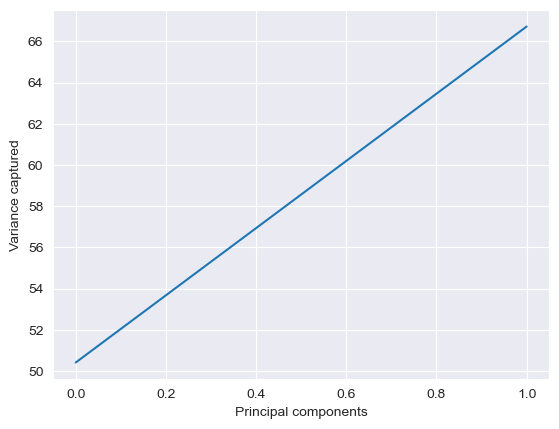

In [27]:

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [28]:
pca = PCA(n_components=3)
Zred = pca.fit_transform(Xnorm)
print(Zred.shape)


(98, 3)


In [29]:
# Reconstruct our data
Xrec = pca.inverse_transform(Zred)
print(Xrec.shape)

(98, 30)


In [30]:
# Measure the reconstruction error
rec_error = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print(rec_error)

0.48593758398590153


In [36]:
# !pip install plotly
# !conda install -c plotly plotly 

          0         1         2
0 -3.282602 -2.238490 -0.608945
1  3.782166 -1.007832  0.432935
2 -1.395873  0.136593  0.687911
3 -3.530849  0.760680 -1.893533
4 -2.842778 -1.099359  1.277088


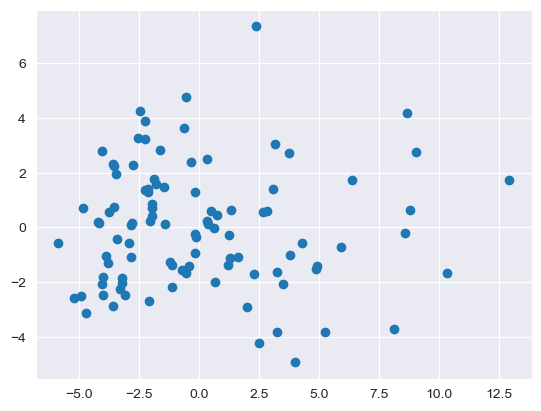

In [37]:
import plotly.express as px
X_pca=pd.DataFrame(Zred)
print(X_pca.head())
plt.scatter( 
   X_pca.iloc[:,0],X_pca.iloc[:,1]
)
plt.show()

<hr>

### Reconstruction Error
<hr>

range(1, 31)
k=1, rec_error=0.7041664292871996
k=2, rec_error=0.5768741133033028
k=3, rec_error=0.48593758398590153
k=4, rec_error=0.421161460262312
k=5, rec_error=0.36045374675457587
k=6, rec_error=0.309131282690603
k=7, rec_error=0.27125793238867757
k=8, rec_error=0.23850958714153778
k=9, rec_error=0.20993574805189139
k=10, rec_error=0.18009067168555537
k=11, rec_error=0.15895469219138866
k=12, rec_error=0.14204872660421056
k=13, rec_error=0.1249166059589077
k=14, rec_error=0.10762651261855656
k=15, rec_error=0.09293005293332163
k=16, rec_error=0.08154504058386751
k=17, rec_error=0.07229131841987833
k=18, rec_error=0.06475153142280245
k=19, rec_error=0.057173660478076004
k=20, rec_error=0.049203315462379854
k=21, rec_error=0.04143559449715611
k=22, rec_error=0.03500391231126629
k=23, rec_error=0.029208658945960496
k=24, rec_error=0.02354687833590146
k=25, rec_error=0.017765175240450234
k=26, rec_error=0.012569695037471459
k=27, rec_error=0.0059002465022944895
k=28, rec_error=0.003314

Text(0, 0.5, 'Reconstruction Error')

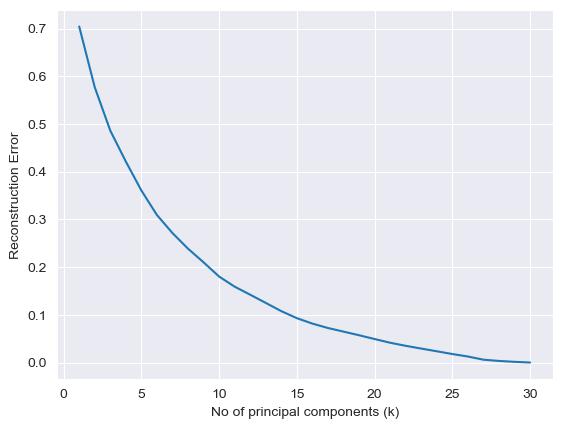

In [38]:
nSamples, nDims = Xnorm.shape

# vary principal components from 1 to 5
n_comp = range(1,nDims+1)
print(n_comp)
# Initialize vector of rec_error
rec_error = np.zeros(len(n_comp)+1)

for k in n_comp:
    pca = PCA(n_components=k)
    Zred = pca.fit_transform(Xnorm)
    Xrec = pca.inverse_transform(Zred)
    rec_error[k] = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
    print("k={}, rec_error={}".format(k, rec_error[k]))

rec_error = rec_error[1:] #we started recording from index 1, so drop index 0


#Visualize the change in error
plt.plot(n_comp,rec_error)
plt.xlabel('No of principal components (k)')
plt.ylabel('Reconstruction Error')


<hr>

### t-SNE
**t-SNE** converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
[Click for more](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
<hr>

In [59]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(Xnorm)
projections

C:\ProgramData\anaconda3\envs\Python307\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\ProgramData\anaconda3\envs\Python307\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[-4.0933895 , -7.939234  ],
       [ 1.5679095 , -1.6835718 ],
       [-2.7101579 , -5.513004  ],
       [-5.8527226 , -5.5035243 ],
       [-5.7860827 , -7.612787  ],
       [-8.289124  , -4.2776504 ],
       [-8.657218  , -2.7376478 ],
       [-4.209436  , -8.56663   ],
       [ 0.67988455, -2.6360996 ],
       [-5.551902  , -6.79508   ],
       [ 0.5557047 , -2.8400378 ],
       [-4.322941  , -7.5043383 ],
       [-4.656694  , -7.6299953 ],
       [-6.3705516 , -4.6357474 ],
       [-7.2170286 , -3.7410967 ],
       [-4.7754564 , -8.272085  ],
       [-8.182316  , -3.1672096 ],
       [-6.015196  , -6.3033376 ],
       [-4.3919773 , -4.932984  ],
       [ 2.5652058 , -2.2609582 ],
       [-2.4234347 , -5.1926274 ],
       [-3.3883061 , -7.4436464 ],
       [-2.5162635 , -2.3153942 ],
       [-0.9185102 , -3.4100263 ],
       [-3.434817  , -6.4584603 ],
       [-6.527614  , -1.6296628 ],
       [-5.090343  , -4.3458176 ],
       [-1.9541686 , -2.586053  ],
       [-6.246147  ,

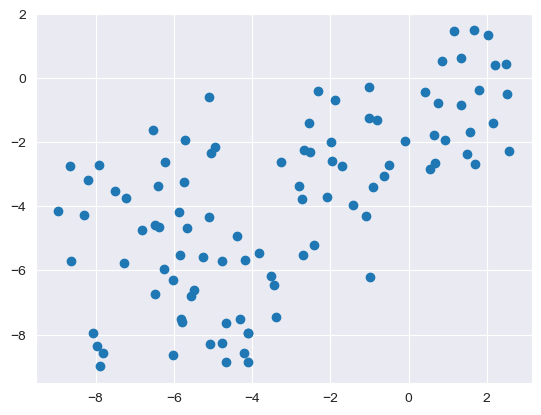

In [57]:
plt.scatter(projections[:,0],projections[:,1]
    )


<hr> 

# Task
1. Load "diabetes" datasets from SKlearn and do the t-SNE for n=3
2. Visualizing the After and before t-SNE for the first two features.
3. Report the reconstruction error.
4. Compare with PCA

<hr> 


# Home task
1. Load "diabetes" datasets from SKlearn and do the UMAP for n=3 [[Hints](https://umap-learn.readthedocs.io/en/latest/)]
2. Visualizing the After and before UMAP for the first two features.
3. Report the reconstruction error.
4. Compare PCA, t-SNE and UMAP

<hr> 